<a href="https://colab.research.google.com/github/falahamro/Identity_mapping/blob/main/Topic_Modeling_Mapping_Moral_Foundations_of_users_posts_on_capital_riots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topic Modeling

In prior analysis, we did the following: 

1. Clustering 
2. PCA
3. Toxicity 
4. Moral Foundations- dictionary


In this analysis, we add another dimension to user idenity; topic modeling using LDA

In [139]:
import pandas as pd
import numpy as np

In [140]:
from google.colab import drive

In [141]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [142]:
df = pd.read_csv ("/content/drive/MyDrive/Colab Notebooks/Moral Foundations Application/Mapping Moral Foundations of Domestic Violent Extremist/capitolriot_test_dataset_predictions.csv")

In [143]:
df.head(20)

,id,comment_text,KMeans,clusters_pca,clusters_labels,Reach,Final_Sentiment,Analysis,Negative,Positive,Neutral,sociability,REPEAT_TIME,REPEAT_USER,created_at,WeeklyPostingPeriod,clean_text,words,sentences,char_count,word_count,sentence_count,avg_word_length,avg_sentence_length,clean_post,total_words,authority/subversion,care/harm,fairness/cheating,liberty/oppression,loyalty/betrayal,sanctity/degradation,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,2.108589e+08,lawmak former kalamazoo po...,1,1,Priority 1,15.384227,0.000,0.0,0,0,0,7.534229,1.0,N,2021-01-11,2021-01-11,"lawmaker, former kalamazoo...","['lawmaker', ',', 'former'...","['lawmaker, former kalamaz...",115,17,1,6.764706,17.000000,"['lawmaker', 'former', 'ka...",17,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0,0,0,0,0,0
1,2.251383e+09,one person show pro trump ...,1,1,Priority 1,16.180192,-0.010,1.0,1,0,0,3.784197,2.5,N,2021-01-11,2021-01-11,only one person showed up ...,"['only', 'one', 'person', ...",['only one person showed u...,133,22,1,6.045455,22.000000,"['only', 'one', 'person', ...",24,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0,0,0,0,0,0
2,2.251383e+09,one person show pro trump ...,1,1,Priority 1,16.180192,-0.010,1.0,1,0,0,3.784197,2.5,Y,2021-01-11,2021-01-11,only one person showed up ...,"['only', 'one', 'person', ...",['only one person showed u...,133,22,1,6.045455,22.000000,"['only', 'one', 'person', ...",24,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0,0,0,0,0,0
3,2.251383e+09,peloton block stopthest ha...,1,1,Priority 1,16.180192,-0.010,1.0,1,0,0,3.784197,2.5,Y,2021-01-11,2021-01-11,peloton is blocking the #s...,"['peloton', 'is', 'blockin...",['peloton is blocking the ...,120,18,1,6.666667,18.000000,"['peloton', 'is', 'blockin...",19,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0,0,0,0,0,0
4,2.251383e+09,peloton block stopthest ha...,1,1,Priority 1,16.180192,-0.010,1.0,1,0,0,3.784197,2.5,Y,2021-01-11,2021-01-11,peloton is blocking the #s...,"['peloton', 'is', 'blockin...",['peloton is blocking the ...,120,18,1,6.666667,18.000000,"['peloton', 'is', 'blockin...",19,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0,0,0,0,0,0
5,1.285880e+18,boycotthegemoni respect te...,2,2,Priority 2,4.174387,0.010,2.0,0,2,0,4.754667,1.0,N,2021-01-11,2021-01-11,@boycotthegemony respectfu...,"['@', 'boycotthegemony', '...",['@boycotthegemony respect...,221,44,4,5.022727,11.000000,"['boycotthegemony', 'respe...",38,2.631579,2.631579,0.000000,0.0,0.0,2.631579,0,0,0,0,0,0
6,7.512020e+17,tell conserv voic continu ...,0,2,Priority 2,7.657755,0.000,0.0,0,0,0,6.977302,1.0,N,2021-01-11,2021-01-11,that tells me conservative...,"['that', 'tells', 'me', 'c...",['that tells me conservati...,206,35,1,5.885714,35.000000,"['that', 'tells', 'me', 'c...",35,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0,0,0,0,0,0
7,1.343350e+18,one person show pro trump ...,0,1,Priority 1,9.382780,-0.010,1.0,1,0,0,6.927567,1.0,N,2021-01-11,2021-01-11,only one person showed up ...,"['only', 'one', 'person', ...",['only one person showed u...,121,22,1,5.500000,22.000000,"['only', 'one', 'person', ...",22,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0,0,0,0,0,0
8,8.841930e+17,drpaulgosar repmobrook rep...,1,1,Priority 1,15.978443,-0.010,1.0,1,0,0,8.509967,1.0,N,2021-01-11,2021-01-11,@drpaulgosar @repmobrooks ...,"['@', 'drpaulgosar', '@', ...",['@drpaulgosar @repmobrook...,195,35,1,5.571429,35.000000,"['drpaulgosar', 'repmobroo...",31,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0,0,0,0,0,0
9,1.228540e+18,senatorcollin thought iran...,0,0,Priority 3,10.884854,0.010,2.0,0,2,0,6.786722,1.0,N,2021-01-11,2021-01-11,@senatorcollins thought it...,"['@', 'senatorcollins', 't...",['@senatorcollins thought ...,208,38,2,5.473684,19.000000,"['senatorcollins', 'though...",27,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0,0,0,0,0,0


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21717 entries, 0 to 21716
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    21717 non-null  float64
 1   comment_text          21717 non-null  object 
 2   KMeans                21717 non-null  int64  
 3   clusters_pca          21717 non-null  int64  
 4   clusters_labels       21717 non-null  object 
 5   Reach                 21717 non-null  float64
 6   Final_Sentiment       21717 non-null  float64
 7   Analysis              21717 non-null  float64
 8   Negative              21717 non-null  int64  
 9   Positive              21717 non-null  int64  
 10  Neutral               21717 non-null  int64  
 11  sociability           21717 non-null  float64
 12  REPEAT_TIME           21717 non-null  float64
 13  REPEAT_USER           21717 non-null  object 
 14  created_at            21717 non-null  object 
 15  WeeklyPostingPeriod

In [145]:
import seaborn as sns

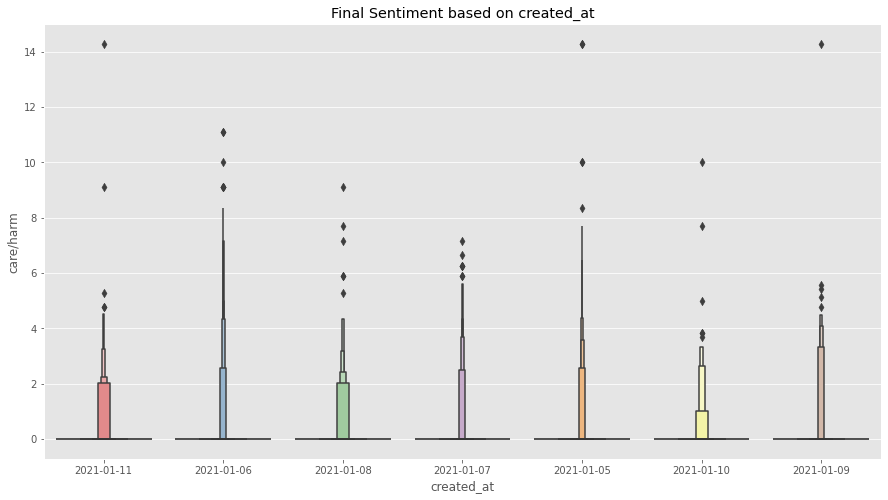

In [146]:
plt.figure(figsize=(15, 8))
pl=sns.boxenplot(y=df["care/harm"],x=df["created_at"], palette= 'Set1')
pl.set_title("Final Sentiment based on created_at")
plt.show()

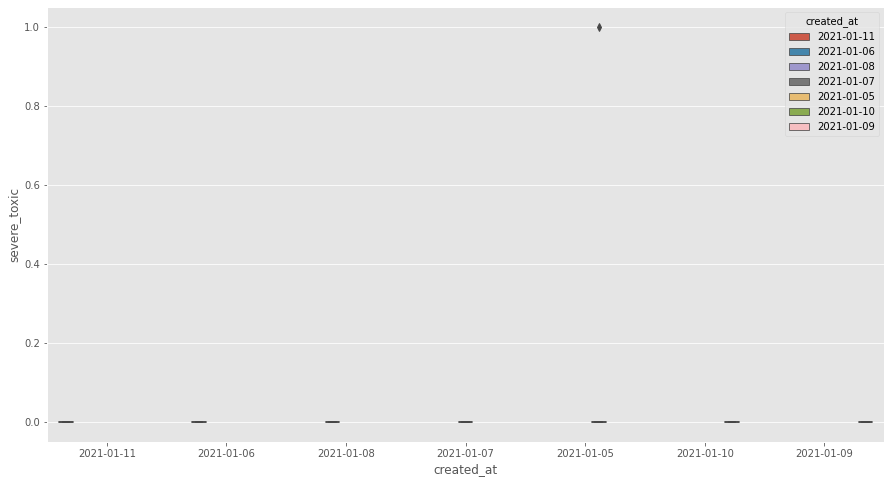

In [147]:
plt.figure(figsize=(15, 8))
sns.boxplot(y='severe_toxic',x = 'created_at', hue = 'created_at',data = df)

https://colab.research.google.com/drive/18_UBeAeSEqjOr_w-pCJVGFM2rUHeOuYy#scrollTo=1FIgkVsRtNpx

(-0.5, 2999.5, 1999.5, -0.5)

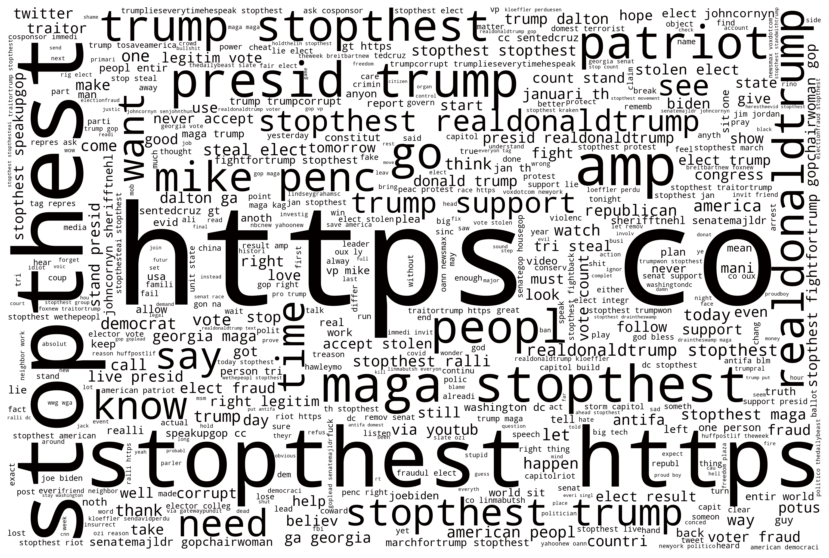

In [148]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def black_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,100%, 1%)")

wordcloud = WordCloud(
                      background_color="white", width=3000, height=2000, collocations=True,
                      max_words=500, stopwords=STOPWORDS).generate_from_text(' '.join(df['comment_text'].values))

# set the word color to black
wordcloud.recolor(color_func = black_color_func)
fig = plt.figure(figsize=[15,10])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
#fig.savefig('./figures/wordcloud.png')

In [149]:
%%capture
pip install tqdm pyLDAvis gensim numpy bokeh contractions datapane

In [150]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [151]:
pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [152]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

In [153]:
# Gensim and LDA
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.parsing.preprocessing import STOPWORDS
import pyLDAvis
#import pyLDAvis.gensim  # don't skip this

# NLP stuff
import contractions
#import demoji
import string
import nltk
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
from nltk.corpus import stopwords
nltk.download('wordnet')
import spacy

# Plotting tools
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
%matplotlib inline

# Miscellaneous
from sklearn.manifold import TSNE
from pprint import pprint

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [154]:
import base64
import re
from tqdm import tqdm
import numpy as np
import pandas as pd
pd.set_option('display.width', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 0)
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import datapane as dp
dp.login(token="fc1a82ae5cb8f3b17c2f4975c0bd05915ce340e1")

Connected successfully to https://datapane.com as falah.amro@gmail.com


'falah.amro@gmail.com'

In [155]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

**Topic Modeling Prep**

Data Preprocessing

In [156]:
def sent_to_words(sentences):
    for sentence in sentences:
      yield(gensim.utils.simple_preprocess(str(sentence).encode('utf-8'), deacc=True)) # deacc=True removes punctuations
data_words = list(sent_to_words(df['comment_text'].tolist()))
print(data_words[:1])
print("Total docs:", len(data_words))

[['lawmak', 'former', 'kalamazoo', 'policeman', 'tweet', 'stopthest', 'violent', 'riot', 'capitol', 'https', 'co', 'lbwwxymnmp']]
Total docs: 21717


In [157]:
# Build the bigram and trigram models
#Pay attention to the code below and modify as you change text input to tweet 
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=25) # higher threshold fewer phrases. May need to change this to make it appropriate for tweet text length
trigram = gensim.models.Phrases(bigram[data_words], min_count=5, threshold=40)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [158]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [159]:
stop_words = stopwords.words('english')

In [160]:
data_no_stopwords = remove_stopwords(data_words)
data_bigrams = make_bigrams(data_no_stopwords)
data_preprocessed = make_trigrams(data_bigrams)
print(*data_preprocessed[:20], sep='\n')

['lawmak_former_kalamazoo_policeman', 'tweet', 'stopthest', 'violent', 'riot', 'capitol', 'https', 'co', 'lbwwxymnmp']
['one_person_show_pro', 'trump', 'protest_outsid_twitter_san', 'francisco_hq', 'https', 'co', 'ewig', 'trbuz', 'https', 'co', 'boztosofk']
['one_person_show_pro', 'trump', 'protest_outsid_twitter_san', 'francisco_hq', 'https', 'co', 'ek', 'uhb', 'hxc', 'https', 'co', 'jotjfbrcm']
['peloton_block', 'stopthest', 'hashtag_creat_use', 'https', 'co', 'fbilfhglso', 'https', 'co', 'fnqsa', 'tmsi']
['peloton_block', 'stopthest', 'hashtag_creat_use', 'https', 'co', 'kmcxf', 'https', 'co', 'mqzp', 'ocp']
['boycotthegemoni', 'respect', 'tend', 'align', 'view', 'trump', 'done', 'mani', 'posit', 'thing', 'stopthest', 'noth', 'short', 'dim', 'wit', 'recast', 'realiti', 'let', 'cut', 'man', 'loos', 'move']
['tell', 'conserv', 'voic', 'continu', 'silenc', 'arbitrari', 'reason', 'one_person_show_pro', 'trump', 'protest_outsid_twitter_san', 'francisco_hq', 'https', 'co', 'unt', 'via', '

Dictionary & Corpu

In [161]:
# Create dictionary and corpus needed for topic modeling

# dictionary is a mapping of word_id --> word, as the variable name implies
id2word = corpora.Dictionary(data_preprocessed)
id2word.filter_extremes(no_below=15, no_above=0.4, keep_n=80000)

# the preprocessed and lemmatized documents themselves
texts = data_preprocessed

# corpus is a mapping of word_id --> word frequency
corpus = [id2word.doc2bow(text) for text in texts]
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1)]]


In [162]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('capitol', 1), ('riot', 1), ('tweet', 1), ('violent', 1)]]

# Latent Dirichlet Allocation (LDA)

In [163]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

Model Evaluation Metrics

In [164]:
from gensim.models import CoherenceModel

# Compute Perplexity (lower is better)
print('Perplexity: ', round(lda_model.log_perplexity(corpus), 2))

# Compute Coherence Score (higher is better)
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_preprocessed, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', round(coherence_lda, 2))

Perplexity:  -7.62
Coherence Score:  0.33


LDA Mallet Model

In [165]:
lda_model = gensim.models.ldamodel.LdaModel(
   corpus=corpus, id2word=id2word, num_topics=20, random_state=10, 
   update_every=1, chunksize=100, passes=10, alpha='auto', per_word_topics=True)

In [166]:
# Show Topics
pprint(lda_model.show_topics(formatted=False)[:3])

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=lda_model, texts=data_preprocessed, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()

print('Coherence Score: ', round(coherence_ldamallet, 2))

[(16,
  [('live_presid_trump_dalton', 0.33444688),
   ('ga_georgia_maga', 0.3310669),
   ('way', 0.045054425),
   ('histori', 0.021832779),
   ('ali', 0.019508276),
   ('find', 0.018627232),
   ('dominion', 0.013497544),
   ('chang', 0.012711286),
   ('someth', 0.011803279),
   ('jennaellisesq', 0.010450406)]),
 (6,
  [('trumpwon', 0.08407217),
   ('help', 0.05393758),
   ('got', 0.05064711),
   ('tonight', 0.032662604),
   ('fair', 0.032614924),
   ('llinwood', 0.031908426),
   ('sinc', 0.031672716),
   ('becom', 0.024320789),
   ('point', 0.024190698),
   ('job', 0.023803663)]),
 (13,
  [('think', 0.072872676),
   ('even', 0.06010596),
   ('thought', 0.05440231),
   ('rt', 0.03080333),
   ('stop_steal', 0.027922725),
   ('drive', 0.02688417),
   ('hold', 0.026204139),
   ('pennsylvania', 0.022538438),
   ('wow', 0.021692986),
   ('cost', 0.02082968)])]
Coherence Score:  0.39


Find most optimal number of topics

In [167]:
from gensim import corpora
from gensim import models
from gensim.models import LdaModel
from gensim.models import TfidfModel
from gensim.models import CoherenceModel

In [168]:
from gensim.models.wrappers import LdaMallet

# TOPIC MODELING: A new Approach

In [169]:
import re
import nltk
import string
import pyLDAvis
from pprint import pprint
from tqdm.notebook import tqdm
import pandas as pd
import matplotlib.pyplot as plt
#from bertopic import BERTopic
import pyLDAvis.gensim_models as gensimvis
from gensim.models.ldamodel import LdaModel, CoherenceModel
from gensim.corpora import Dictionary
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore" , category=DeprecationWarning)
pyLDAvis.enable_notebook()
tqdm.pandas()
plt.style.use("ggplot")

In [170]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21717 entries, 0 to 21716
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    21717 non-null  float64
 1   comment_text          21717 non-null  object 
 2   KMeans                21717 non-null  int64  
 3   clusters_pca          21717 non-null  int64  
 4   clusters_labels       21717 non-null  object 
 5   Reach                 21717 non-null  float64
 6   Final_Sentiment       21717 non-null  float64
 7   Analysis              21717 non-null  float64
 8   Negative              21717 non-null  int64  
 9   Positive              21717 non-null  int64  
 10  Neutral               21717 non-null  int64  
 11  sociability           21717 non-null  float64
 12  REPEAT_TIME           21717 non-null  float64
 13  REPEAT_USER           21717 non-null  object 
 14  created_at            21717 non-null  object 
 15  WeeklyPostingPeriod

In [172]:
df = df.astype({"id": str})

In [173]:
df['comment_text'][0]

'lawmak former kalamazoo policeman tweet stopthest violent riot capitol https co lbwwxymnmp'

Wordcloud

In [174]:
stopwords = nltk.corpus.stopwords.words('english')

In [175]:
wordcloud = WordCloud(width = 800, height = 800, 
                      background_color = 'black', 
                      stopwords = stopwords, 
                      min_font_size= 12).generate(' '.join(topic for topic in df['clean_text']))

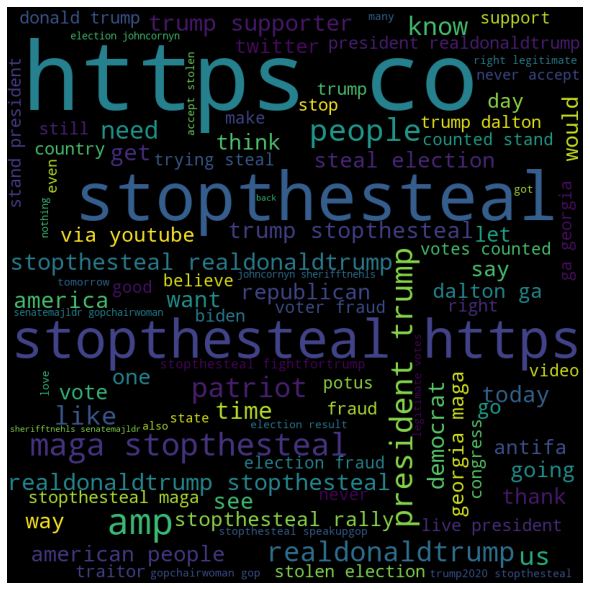

In [176]:
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()



Based on the wordcloud shown above we can extend our stopwords list to include some other words.

In [177]:
stopwords.extend(['https'])

Text preprocessing


In [178]:
def tokenize(text_string):
  return word_tokenize(text_string)

def remove_punct(text):
    text  = [''.join(filter( lambda x: x in 'abcdefghijklmnopqrstuvwxyz', word.lower()))
             for word in text]
    return text

def remove_stopwords(text):
    text = [word for word in text if word not in stopwords]
    return text


def stemming(text):
    stemm = nltk.PorterStemmer()
    text = [stemm.stem(word) for word in text]
    return text


def lemmatizer(text):
    lemm = nltk.WordNetLemmatizer()
    text = [lemm.lemmatize(word) for word in text]
    return text

def clean_text(text):
  text = tokenize(text)
  text = remove_punct(text)
  # text = stemming(text)
  text = remove_stopwords(text)

  return text

In [179]:
cleaned_text_data = [ x for x in df['comment_text'].progress_apply(clean_text)]

  0%|          | 0/21717 [00:00<?, ?it/s]

**LDA**

At first, We create a Bag of Words (BOW) dictionary from the cleaned and processed docs containing the number of times a word appears in the training set.

In [180]:
id2word = Dictionary(cleaned_text_data)
corpus = [id2word.doc2bow(text) for text in cleaned_text_data]

In [181]:
len(corpus)

21717

In [182]:
#explore some terms generated from bow
[(id2word[id], freq) for id, freq in corpus[0]][:20]

[('capitol', 1),
 ('co', 1),
 ('former', 1),
 ('kalamazoo', 1),
 ('lawmak', 1),
 ('lbwwxymnmp', 1),
 ('policeman', 1),
 ('riot', 1),
 ('stopthest', 1),
 ('tweet', 1),
 ('violent', 1)]

Baseline LDA model

In [183]:
#We build the baseline lda model with number of topic = 10
num_topics = 10
lda_model = LdaModel(corpus=corpus,
                     id2word=id2word,
                     num_topics=num_topics)

In [184]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.054*"stopthest" + 0.027*"elector" + 0.026*"co" + 0.017*"trump" + '
  '0.015*"vote" + 0.015*"support" + 0.010*"colleg" + 0.009*"fraudul" + '
  '0.009*"elect" + 0.009*"object"'),
 (1,
  '0.061*"stopthest" + 0.034*"co" + 0.029*"trump" + 0.024*"patriot" + '
  '0.015*"god" + 0.012*"america" + 0.011*"maga" + 0.011*"amp" + 0.010*"jan" + '
  '0.009*"fight"'),
 (2,
  '0.067*"stopthest" + 0.048*"co" + 0.035*"trump" + 0.031*"dalton" + '
  '0.030*"georgia" + 0.030*"maga" + 0.029*"presid" + 0.027*"live" + 0.027*"ga" '
  '+ 0.022*"youtub"'),
 (3,
  '0.057*"stopthest" + 0.038*"co" + 0.022*"trump" + 0.017*"peopl" + '
  '0.016*"steal" + 0.014*"realdonaldtrump" + 0.013*"elect" + 0.011*"tri" + '
  '0.010*"american" + 0.008*"support"'),
 (4,
  '0.056*"stopthest" + 0.050*"co" + 0.023*"dc" + 0.016*"live" + 0.014*"ralli" '
  '+ 0.010*"stay" + 0.010*"watch" + 0.009*"patriot" + 0.009*"go" + '
  '0.008*"notic"'),
 (5,
  '0.061*"stopthest" + 0.034*"vote" + 0.022*"co" + 0.022*"georgia" + '
  '0.016*"tru

Get model with optimum number of topics

In [185]:
def find_optim_num_topic(dictionary , corpus , text , max=29 , start = 5 , step = 2):
    
    max_cohernce = 0
    best_model = 0
    coherence_values = []
    optim_num_topics = 0
    for num_topics in tqdm(range(start , max , step)):
        model =  LdaModel(corpus=corpus,
                          id2word=id2word,
                          num_topics=num_topics,
                          update_every=1)
        

        coherencemodel = CoherenceModel(model=model , 
                                        texts=text , 
                                        dictionary=dictionary , 
                                        coherence='c_v')
        
        coherence_value = coherencemodel.get_coherence()
        if coherence_value > max_cohernce:
          max_cohernce = coherence_value
          best_model = model
          optim_num_topics = num_topics

        coherencemodel = CoherenceModel(model=model , texts=text , dictionary=dictionary , coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        print(f"With num_topics={num_topics}, The coherence_value={coherence_value}")
    print(f"Return best model with num_topics={optim_num_topics} and max coherence_value={max_cohernce:.2f}")
    return best_model , coherence_values

In [186]:
best_model, coherence_values = find_optim_num_topic(dictionary=id2word , corpus=corpus , text=cleaned_text_data)

  0%|          | 0/12 [00:00<?, ?it/s]

With num_topics=5, The coherence_value=0.3923493195468805
With num_topics=7, The coherence_value=0.3715676099671052
With num_topics=9, The coherence_value=0.34198806272301435
With num_topics=11, The coherence_value=0.3526653202923416
With num_topics=13, The coherence_value=0.3374076064561825
With num_topics=15, The coherence_value=0.3558826493850058
With num_topics=17, The coherence_value=0.3641390701932452
With num_topics=19, The coherence_value=0.35355899688356784
With num_topics=21, The coherence_value=0.35834074818263495
With num_topics=23, The coherence_value=0.3373853843412064
With num_topics=25, The coherence_value=0.3303570779717291
With num_topics=27, The coherence_value=0.33897953685358506
Return best model with num_topics=5 and max coherence_value=0.39


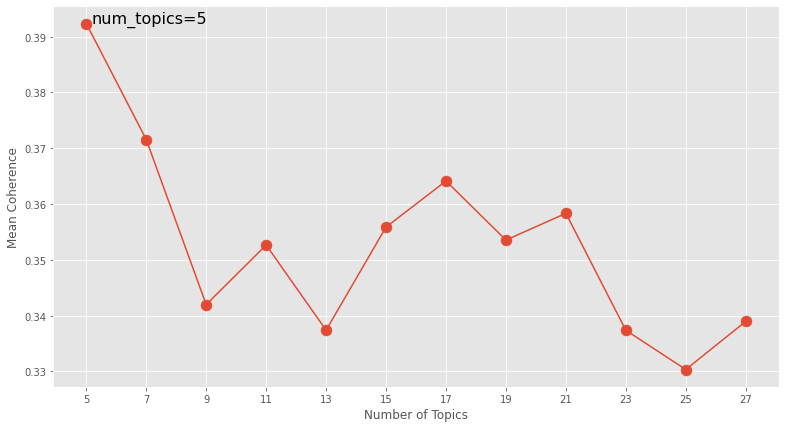

In [187]:
fig = plt.figure(figsize=(13,7))
# create the line plot
k_values = range(5 , 29 , 2)
ax = plt.plot( k_values, coherence_values )
plt.xticks(k_values)
plt.xlabel("Number of Topics")
plt.ylabel("Mean Coherence")
# add the points
plt.scatter( k_values, coherence_values, s=120)
# find and annotate the maximum point on the plot
ymax = max(coherence_values)
xpos = coherence_values.index(ymax)
best_k = k_values[xpos]
plt.annotate( "num_topics=%d" % best_k, xy=(best_k, ymax), xytext=(best_k, ymax), textcoords="offset points", fontsize=16)
# show the plot
plt.show()

**Visulize the model**

In [188]:
LDAvis= gensimvis.prepare(best_model, corpus, id2word)

In [189]:
LDAvis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.100596 -0.010521  1       1        27.781113
1     -0.106129  0.084536  2       1        20.551284
2     -0.037197 -0.136164  3       1        17.744288
4      0.088300  0.101351  4       1        17.107245
0      0.155622 -0.039202  5       1        16.816070, topic_info=            Term          Freq         Total Category  logprob  loglift
152   elect       3512.000000   3512.000000   Default  30.0000  30.0000
1     co          11291.000000  11291.000000  Default  29.0000  29.0000
23    trump       6084.000000   6084.000000   Default  28.0000  28.0000
7417  dalton      1074.000000   1074.000000   Default  27.0000  27.0000
363   ga          1478.000000   1478.000000   Default  26.0000  26.0000
...   ..                  ...           ...       ...      ...      ...
315   wethepeopl  190.840232    401.931211    Topic5  -5.7339   1.0380 
858   youtub      259.829706    969.920896    Topic5  -5.4253   0.4656 
68    via         209.184866    990.849202    Topic5  -5.6421   0.2275 
105   go          214.847705    1269.639186   Topic5  -5.6154   0.0063 
593   antifa      181.346905    688.721046    Topic5  -5.7849   0.4484 

[415 rows x 6 columns], token_table=       Topic      Freq    Term
term                          
2331   1      0.963359  abc   
2331   2      0.033606  abc   
34728  2      0.102380  ack   
34728  3      0.883030  ack   
7983   1      0.988477  adjud 
...   ..           ...  ...   
858    1      0.001031  youtub
858    2      0.003093  youtub
858    3      0.002062  youtub
858    4      0.725832  youtub
858    5      0.268063  youtub

[932 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 3, 5, 1])

**Map docoments to topics**

In [190]:
df['lda_topic'] = [best_model.get_document_topics(x)[0][0] for x in tqdm(corpus)]

  0%|          | 0/21717 [00:00<?, ?it/s]

Count of dataset Documents in each topic

Text(0.5, 1.0, 'Number of documents per topic in the data')

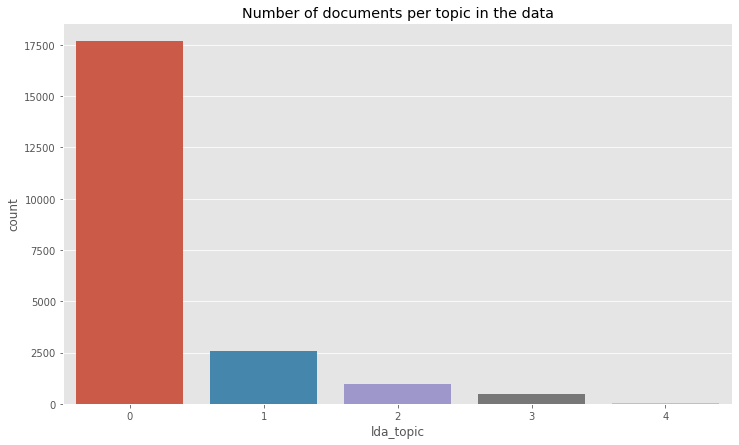

In [191]:
plt.figure(figsize=(12, 7))
import seaborn as sns
sns.countplot(df['lda_topic'])
plt.title("Number of documents per topic in the data")

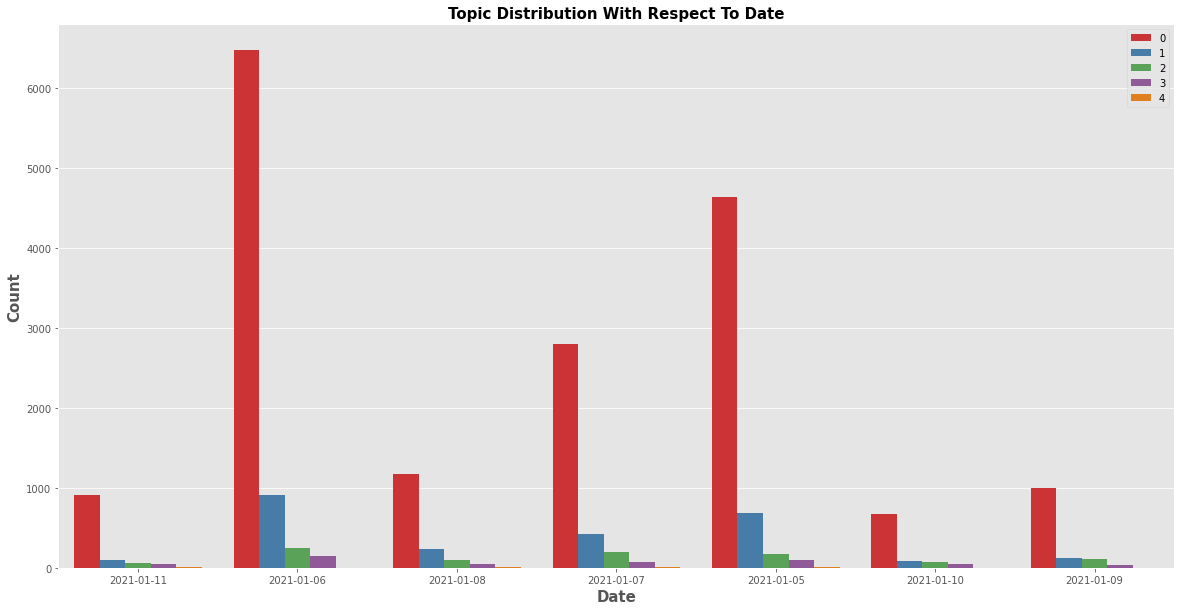

In [192]:
plt.figure(figsize=(20,10))
sns.countplot(df['created_at'], hue=df['lda_topic'], palette = 'Set1',)
plt.legend(loc='upper right')
plt.ylabel('Count', fontsize=15, fontweight='bold')
plt.xlabel('Date', fontsize=15, fontweight='bold')
plt.title('Topic Distribution With Respect To Date', fontsize=15, fontweight='bold')
plt.show()

In [193]:
pd.set_option('display.max_colwidth', 30)

In [194]:
df.head()

,id,comment_text,KMeans,clusters_pca,clusters_labels,Reach,Final_Sentiment,Analysis,Negative,Positive,Neutral,sociability,REPEAT_TIME,REPEAT_USER,created_at,WeeklyPostingPeriod,clean_text,words,sentences,char_count,word_count,sentence_count,avg_word_length,avg_sentence_length,clean_post,total_words,authority/subversion,care/harm,fairness/cheating,liberty/oppression,loyalty/betrayal,sanctity/degradation,toxic,severe_toxic,obscene,threat,insult,identity_hate,lda_topic
0,210858874.0,lawmak former kalamazoo po...,1,1,Priority 1,15.384227,0.00,0.0,0,0,0,7.534229,1.0,N,2021-01-11,2021-01-11,"lawmaker, former kalamazoo...","['lawmaker', ',', 'former'...","['lawmaker, former kalamaz...",115,17,1,6.764706,17.0,"['lawmaker', 'former', 'ka...",17,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0
1,2251383210.0,one person show pro trump ...,1,1,Priority 1,16.180192,-0.01,1.0,1,0,0,3.784197,2.5,N,2021-01-11,2021-01-11,only one person showed up ...,"['only', 'one', 'person', ...",['only one person showed u...,133,22,1,6.045455,22.0,"['only', 'one', 'person', ...",24,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0
2,2251383210.0,one person show pro trump ...,1,1,Priority 1,16.180192,-0.01,1.0,1,0,0,3.784197,2.5,Y,2021-01-11,2021-01-11,only one person showed up ...,"['only', 'one', 'person', ...",['only one person showed u...,133,22,1,6.045455,22.0,"['only', 'one', 'person', ...",24,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0
3,2251383210.0,peloton block stopthest ha...,1,1,Priority 1,16.180192,-0.01,1.0,1,0,0,3.784197,2.5,Y,2021-01-11,2021-01-11,peloton is blocking the #s...,"['peloton', 'is', 'blockin...",['peloton is blocking the ...,120,18,1,6.666667,18.0,"['peloton', 'is', 'blockin...",19,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0
4,2251383210.0,peloton block stopthest ha...,1,1,Priority 1,16.180192,-0.01,1.0,1,0,0,3.784197,2.5,Y,2021-01-11,2021-01-11,peloton is blocking the #s...,"['peloton', 'is', 'blockin...",['peloton is blocking the ...,120,18,1,6.666667,18.0,"['peloton', 'is', 'blockin...",19,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0


In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21717 entries, 0 to 21716
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    21717 non-null  object 
 1   comment_text          21717 non-null  object 
 2   KMeans                21717 non-null  int64  
 3   clusters_pca          21717 non-null  int64  
 4   clusters_labels       21717 non-null  object 
 5   Reach                 21717 non-null  float64
 6   Final_Sentiment       21717 non-null  float64
 7   Analysis              21717 non-null  float64
 8   Negative              21717 non-null  int64  
 9   Positive              21717 non-null  int64  
 10  Neutral               21717 non-null  int64  
 11  sociability           21717 non-null  float64
 12  REPEAT_TIME           21717 non-null  float64
 13  REPEAT_USER           21717 non-null  object 
 14  created_at            21717 non-null  object 
 15  WeeklyPostingPeriod

In [196]:
from google.colab import files 
df.to_csv('holistic_Identity_Mappingtopicmodel_toxic_moral_cluster_feature_pca.csv')
files.download('holistic_Identity_Mappingtopicmodel_toxic_moral_cluster_feature_pca.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>